### **Objectif de l'exercice**
Établir un classement des communes et départements disposant des meilleures couvertures mobiles pour plusieurs opérateurs français.

Le données disponibles en open data :
* la taille de la population par commune ([source](https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511))
* des informations sur la connectivité mobile par commune ([source](https://www.data.gouv.fr/fr/datasets/mon-reseau-mobile/))

In [413]:
# Importation des packages de bases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Partie 1

In [449]:
# chargement des données
df_pop = pd.read_csv(r'L:Communes.csv', sep=';', encoding='utf-8')

In [450]:
df_pop.head(5)

,DEPCOM,COM,PMUN,PCAP,PTOT
0,01001,L' Abergement-Clémenciat,776,18,794
1,01002,L' Abergement-de-Varey,248,1,249
2,01004,Ambérieu-en-Bugey,14035,393,14428
3,01005,Ambérieux-en-Dombes,1689,34,1723
4,01006,Ambléon,111,6,117


In [451]:
df_pop[['DEPCOM', 'COM', 'PTOT']]

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


**DEPCOM** : numéro de commune

**COM** : nom de la commune

**PMUN** : population municipale : résidence habituelle, détenues, sans abri recensées et personnes résidant habituellement dans une habitation mobile recensées sur le territoire de la commune.

**PCAP** : population comptée à part : résidences principale dans une autre commune avec résidence sécondaire sur la commune.

**PTOT** : population totale : population municipale + population comptée à part.

In [452]:
# on ne va donc ici s'intéressé qu'à la population totale
df_pop.iloc[:, [0,1,4]]

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


In [453]:
df_pop.loc[:, ['DEPCOM','COM','PTOT']]

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


In [454]:
df_pop.iloc[0:3, [0,1,4]]

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428


In [455]:
df_pop.iloc[[0,1,3], [0,1,4]]

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
3,01005,Ambérieux-en-Dombes,1723


In [456]:
type(df_pop)

pandas.core.frame.DataFrame

In [457]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34995 entries, 0 to 34994
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DEPCOM  34995 non-null  object
 1   COM     34995 non-null  object
 2   PMUN    34995 non-null  int64 
 3   PCAP    34995 non-null  int64 
 4   PTOT    34995 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


In [458]:
df_pop.dtypes

DEPCOM    object
COM       object
PMUN       int64
PCAP       int64
PTOT       int64
dtype: object

In [459]:
df_pop.shape

(34995, 5)

In [460]:
# on vérifie la 'qualité' des données
df_pop.isna()

,DEPCOM,COM,PMUN,PCAP,PTOT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
34990,False,False,False,False,False
34991,False,False,False,False,False
34992,False,False,False,False,False
34993,False,False,False,False,False


In [461]:
df_pop.isna().sum()

DEPCOM    0
COM       0
PMUN      0
PCAP      0
PTOT      0
dtype: int64

In [462]:
df_pop.isna().mean()

DEPCOM    0.0
COM       0.0
PMUN      0.0
PCAP      0.0
PTOT      0.0
dtype: float64

In [463]:
df_pop.isna().any()

DEPCOM    False
COM       False
PMUN      False
PCAP      False
PTOT      False
dtype: bool

In [464]:
df_pop.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34990    False
34991    False
34992    False
34993    False
34994    False
Length: 34995, dtype: bool

In [465]:
df_pop.duplicated(subset='DEPCOM')

0        False
1        False
2        False
3        False
4        False
         ...  
34990    False
34991    False
34992    False
34993    False
34994    False
Length: 34995, dtype: bool

In [466]:
df_pop.duplicated(subset='DEPCOM').sum()

0

--
#### On a ici un très beau jeu de donnée, pas de NA ni de redondance
-- 

In [467]:
df_pop.sort_values('PTOT', ascending=False).head(15)

,DEPCOM,COM,PMUN,PCAP,PTOT
11831,31555,Toulouse,479553,5256,484809
1958,06088,Nice,340017,2962,342979
16332,44109,Nantes,309346,5157,314503
13035,34172,Montpellier,285121,3479,288600
26571,67482,Strasbourg,280966,2779,283745
12386,33063,Bordeaux,254436,3368,257804
29311,75115,Paris 15e Arrondissement,233392,1786,235178
22165,59350,Lille,232787,2055,234842
13425,35238,Rennes,216815,4110,220925
29316,75120,Paris 20e Arrondissement,195814,925,196739


In [468]:
df_pop['PTOT'].describe()

count     34995.000000
mean       1936.307815
std        8696.358429
min           0.000000
25%         203.000000
50%         468.000000
75%        1184.000000
max      484809.000000
Name: PTOT, dtype: float64

In [469]:
df_pop['PTOT'].sum()

67761092

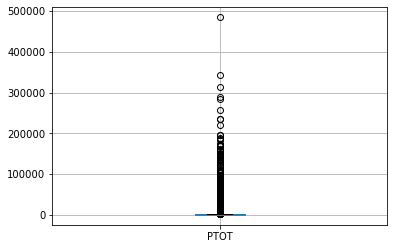

In [470]:
df_pop.boxplot('PTOT')

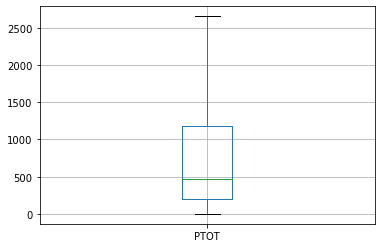

In [471]:
df_pop.boxplot('PTOT', showfliers=False); # Remove (les données que lon considère comme des) outliers beyond the caps
# la simplification est un peu rapide ici...

--
#### On a des données plutôt hétérogène sur la taille de la population en fonction de la commune
--

In [472]:
df_pop['PTOT']==0

0        False
1        False
2        False
3        False
4        False
         ...  
34990    False
34991    False
34992    False
34993    False
34994    False
Name: PTOT, Length: 34995, dtype: bool

In [473]:
df_pop[df_pop['PTOT']==0]

,DEPCOM,COM,PMUN,PCAP,PTOT
20074,55039,Beaumont-en-Verdunois,0,0,0
20085,55050,Bezonvaux,0,0,0
20161,55139,Cumières-le-Mort-Homme,0,0,0
20205,55189,Fleury-devant-Douaumont,0,0,0
20243,55239,Haumont-près-Samogneux,0,0,0
20301,55307,Louvemont-Côte-du-Poivre,0,0,0


In [509]:
df_pop2 = df_pop.drop(['PMUN', 'PCAP'], axis=1) # axis=1 for col, 0 for lines
df_pop2

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


In [510]:
# 'renomage' de colonne v1
df_pop2.columns = ['ren1', 'ren2', 'ren3']
df_pop2

,ren1,ren2,ren3
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


In [511]:
# 'renomage' de colonne v2
df_pop2 = df_pop2.rename({'ren1' : 'code_dep', 'ren2' : 'nom_dep', 'ren3' : 'population'}, axis=1)
df_pop2

,code_dep,nom_dep,population
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


In [512]:
# les villes de Paris, Lyon et Marseille on plusieurs arrondissement, on va donc les jumeler
# pour plus de simplicité

# df_pop2[df_pop2["nom_dep"].str.endswith('Arrondissement')]
filter1 = df_pop2["nom_dep"].str.endswith('Arrondissement')
df_pop2[filter1]

,code_dep,nom_dep,population
4349,13201,Marseille 1er Arrondissement,39967
4350,13202,Marseille 2e Arrondissement,24873
4351,13203,Marseille 3e Arrondissement,48990
4352,13204,Marseille 4e Arrondissement,48791
4353,13205,Marseille 5e Arrondissement,46499
4354,13206,Marseille 6e Arrondissement,43249
4355,13207,Marseille 7e Arrondissement,35228
4356,13208,Marseille 8e Arrondissement,82208
4357,13209,Marseille 9e Arrondissement,76572
4358,13210,Marseille 10e Arrondissement,56512


In [513]:
pop_paris = df_pop2[(filter1) & (df_pop2["nom_dep"].str.startswith('Paris '))]['population'].sum()
pop_lyon = df_pop2[(filter1) & (df_pop2["nom_dep"].str.startswith('Lyon '))]['population'].sum()
pop_mars = df_pop2[(filter1) & (df_pop2["nom_dep"].str.startswith('Marseille '))]['population'].sum()
print(pop_paris)
print(pop_lyon)
print(pop_mars)

2204773
522679
869815


In [514]:
df_pop2[filter1].index

Int64Index([ 4349,  4350,  4351,  4352,  4353,  4354,  4355,  4356,  4357,
             4358,  4359,  4360,  4361,  4362,  4363,  4364, 27138, 27139,
            27140, 27141, 27142, 27143, 27144, 27145, 27146, 29297, 29298,
            29299, 29300, 29301, 29302, 29303, 29304, 29305, 29306, 29307,
            29308, 29309, 29310, 29311, 29312, 29313, 29314, 29315, 29316],
           dtype='int64')

In [515]:
df_pop2 = df_pop2.drop(df_pop2[filter1].index, axis=0)

In [516]:
df_pop2 = df_pop2.append(pd.DataFrame([['75056', 'Paris', pop_paris],
                                      ['69123', 'Lyon', pop_lyon],
                                      ['13055', 'Marseille', pop_mars]],
                                     columns = ['code_dep', 'nom_dep', 'population'])) 
# les codes insee sont repris de la partie 2

In [517]:
print(df_pop.shape)
print(df_pop2.shape)
print('-'*3)
print(df_pop['PTOT'].sum())
print(df_pop2['population'].sum())

(34995, 5)
(34953, 3)
---
67761092
67761092


--
##### l'opération à bien fonctionné, on a moins de lignes mais la même population cumulée
--

In [518]:
df_pop2

,code_dep,nom_dep,population
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34993,97422,Le Tampon,79705
34994,97423,Les Trois-Bassins,7234
0,75056,Paris,2204773
1,69123,Lyon,522679


In [519]:
# reset index pour remettre le dataframe au propre
df_pop2 = df_pop2.reset_index(drop=True) # drop=True --> evite de garder les anciens index (--> colonnes)
print(df_pop2)

      code_dep                   nom_dep  population
0        01001  L' Abergement-Clémenciat         794
1        01002    L' Abergement-de-Varey         249
2        01004         Ambérieu-en-Bugey       14428
3        01005       Ambérieux-en-Dombes        1723
4        01006                   Ambléon         117
...        ...                       ...         ...
34948    97422                 Le Tampon       79705
34949    97423         Les Trois-Bassins        7234
34950    75056                     Paris     2204773
34951    69123                      Lyon      522679
34952    13055                 Marseille      869815

[34953 rows x 3 columns]


## Partie 2

In [520]:
# chargement du deuxième set de données de réseaux
df_r = pd.read_csv(r'L:2020-t2-metropole-sites.csv', sep=';', encoding='iso-8859-1', low_memory=False)

In [521]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86444 entries, 0 to 86443
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code_op       86444 non-null  int64 
 1   nom_op        86444 non-null  object
 2   num_site      86444 non-null  object
 3   x_lambert_93  86444 non-null  object
 4   y_lambert_93  86444 non-null  object
 5   nom_reg       86444 non-null  object
 6   nom_dep       86444 non-null  object
 7   insee_dep     86444 non-null  object
 8   nom_com       86433 non-null  object
 9   insee_com     86444 non-null  object
 10  site_2g       86444 non-null  int64 
 11  site_3g       86444 non-null  int64 
 12  site_4g       86444 non-null  int64 
 13  mes_4g_trim   86444 non-null  int64 
 14  site_ZB       86444 non-null  int64 
 15  site_DCC      86444 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 10.6+ MB


In [522]:
df_r.head(5)

,code_op,nom_op,num_site,x_lambert_93,y_lambert_93,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,mes_4g_trim,site_ZB,site_DCC
0,20801,Orange,0012290010,872639,6570768,AUVERGNE RHONE ALPES,AIN,01,BOURG EN BRESSE,01053,1,1,1,0,0,0
1,20801,Orange,0012290011,860279,6529851,AUVERGNE RHONE ALPES,AIN,01,DAGNEUX,01142,1,1,1,0,0,0
2,20801,Orange,0012290012,852231,6532639,AUVERGNE RHONE ALPES,AIN,01,TRAMOYES,01424,1,1,1,0,0,0
3,20801,Orange,0012290014,901020,6564540,AUVERGNE RHONE ALPES,AIN,01,NANTUA,01269,1,1,1,0,0,0
4,20801,Orange,0012290016,903596,6563175,AUVERGNE RHONE ALPES,AIN,01,NEYROLLES,01274,1,1,1,0,0,0


**code_op** : code de l'opérateur
**nom_op** : nom de l'opérateur
**num_site** : numéro du site  
**x_lambert_93 / y_lambert_93** :  projections cartographiques	
**nom_reg**	: région
**nom_dep** : département	
**insee_dep** : numéro département insée
**nom_com**	: commune
**insee_com** : numéro de commune insée
**site_(x)g** : couverture en (x)g du site	
**mes_4g_trim** : ?	
**site_ZB**	: ?
**site_DCC** : ?

In [523]:
# vérification de la qualité des données
df_r.isna().sum()

code_op          0
nom_op           0
num_site         0
x_lambert_93     0
y_lambert_93     0
nom_reg          0
nom_dep          0
insee_dep        0
nom_com         11
insee_com        0
site_2g          0
site_3g          0
site_4g          0
mes_4g_trim      0
site_ZB          0
site_DCC         0
dtype: int64

In [524]:
df_r.duplicated().sum()

113

In [525]:
df_r = df_r.drop_duplicates() # version un peu rapide et olé olé du clean
df_r.duplicated().sum()

0

In [526]:
df_r2 = df_r.drop(['num_site', 'code_op', 'x_lambert_93', 'mes_4g_trim', 'y_lambert_93', 'site_ZB', 'site_DCC'], axis=1)
df_r2

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g
0,Orange,AUVERGNE RHONE ALPES,AIN,01,BOURG EN BRESSE,01053,1,1,1
1,Orange,AUVERGNE RHONE ALPES,AIN,01,DAGNEUX,01142,1,1,1
2,Orange,AUVERGNE RHONE ALPES,AIN,01,TRAMOYES,01424,1,1,1
3,Orange,AUVERGNE RHONE ALPES,AIN,01,NANTUA,01269,1,1,1
4,Orange,AUVERGNE RHONE ALPES,AIN,01,NEYROLLES,01274,1,1,1
...,...,...,...,...,...,...,...,...,...
86439,Bouygues Telecom,PROVENCE-ALPES-COTE D'AZUR,VAUCLUSE,84,GRAMBOIS,84052,0,1,0
86440,Bouygues Telecom,GRAND EST,VOSGES,88,MARTIGNY-LES-GERBONVAUX,88290,0,1,0
86441,Bouygues Telecom,GRAND EST,VOSGES,88,GRIGNONCOURT,88220,0,1,1
86442,Bouygues Telecom,GRAND EST,VOSGES,88,PROVENCHERES-LES-DARNEY,88360,0,1,1


In [527]:
df_r2['nom_dep'].unique()

array(['AIN', 'AISNE', 'ALLIER', 'ALPES-DE-HAUTE-PROVENCE',
       'HAUTES-ALPES', 'ALPES-MARITIMES', 'ARDECHE', 'ARDENNES', 'ARIEGE',
       'AUBE', 'HAUTE-MARNE', 'AUDE', 'AVEYRON', 'BOUCHES-DU-RHONE',
       'CALVADOS', 'CANTAL', 'CHARENTE', 'CHARENTE-MARITIME', 'CHER',
       'CORREZE', "COTE-D'OR", "COTES-D'ARMOR", 'CREUSE', 'INDRE',
       'DORDOGNE', 'DOUBS', 'DROME', 'EURE', 'SEINE-MARITIME',
       'EURE-ET-LOIR', 'FINISTERE', 'CORSE-DU-SUD', 'HAUTE-CORSE', 'GARD',
       'HAUTE-GARONNE', 'GERS', 'GIRONDE', 'HERAULT', 'ILLE-ET-VILAINE',
       'INDRE-ET-LOIRE', 'ISERE', 'JURA', 'LANDES', 'LOIR-ET-CHER',
       'LOIRE', 'RHONE', 'HAUTE-LOIRE', 'LOIRE-ATLANTIQUE', 'MORBIHAN',
       'LOIRET', 'LOT', 'LOT-ET-GARONNE', 'LOZERE', 'MAINE-ET-LOIRE',
       'MANCHE', 'MARNE', 'MAYENNE', 'MEURTHE-ET-MOSELLE', 'MOSELLE',
       'MEUSE', 'NIEVRE', 'NORD', 'OISE', 'ORNE', 'PAS-DE-CALAIS',
       'PUY-DE-DOME', 'PYRENEES-ATLANTIQUES', 'HAUTES-PYRENEES',
       'PYRENEES-ORIENTALES', 'BAS-R

In [528]:
df_r2['nom_dep'] = df_r2['nom_dep'].str.lower().str.replace('-', ' ')
df_r2['nom_dep'] = df_r2['nom_dep'].str.lower().str.replace('\x92', "\'")
df_r2['nom_dep'].unique()

array(['ain', 'aisne', 'allier', 'alpes de haute provence',
       'hautes alpes', 'alpes maritimes', 'ardeche', 'ardennes', 'ariege',
       'aube', 'haute marne', 'aude', 'aveyron', 'bouches du rhone',
       'calvados', 'cantal', 'charente', 'charente maritime', 'cher',
       'correze', "cote d'or", "cotes d'armor", 'creuse', 'indre',
       'dordogne', 'doubs', 'drome', 'eure', 'seine maritime',
       'eure et loir', 'finistere', 'corse du sud', 'haute corse', 'gard',
       'haute garonne', 'gers', 'gironde', 'herault', 'ille et vilaine',
       'indre et loire', 'isere', 'jura', 'landes', 'loir et cher',
       'loire', 'rhone', 'haute loire', 'loire atlantique', 'morbihan',
       'loiret', 'lot', 'lot et garonne', 'lozere', 'maine et loire',
       'manche', 'marne', 'mayenne', 'meurthe et moselle', 'moselle',
       'meuse', 'nievre', 'nord', 'oise', 'orne', 'pas de calais',
       'puy de dome', 'pyrenees atlantiques', 'hautes pyrenees',
       'pyrenees orientales', 'bas r

In [529]:
df_r2['nom_com'].unique()

array(['BOURG EN BRESSE', 'DAGNEUX', 'TRAMOYES', ...,
       'BOURGUIGNON-LES-MOREY', 'GRURY', 'SAINT-CHRISTOPHE-EN-BRIONNAIS'],
      dtype=object)

In [530]:
df_r2['nom_op'].unique()

array(['Orange', 'SFR', 'Free Mobile', 'Bouygues Telecom'], dtype=object)

In [531]:
# réseau historique ?
df_r2['nom_op'].value_counts()

Orange              25141
SFR                 22267
Bouygues Telecom    21005
Free Mobile         17918
Name: nom_op, dtype: int64

In [532]:
# check "état" du réseau
df_r2.pivot_table(['site_2g', 'site_3g', 'site_4g'], ['nom_op'], aggfunc='sum', margins=True) # margins pour le total

,site_2g,site_3g,site_4g
nom_op,,,
Bouygues Telecom,19988,20823,19158
Free Mobile,0,17918,16605
Orange,19766,24770,22620
SFR,20621,22093,19758
All,60375,85604,78141


In [533]:
# Communes disposant du plus d'antennes
df_r2.groupby('insee_com').sum()

,site_2g,site_3g,site_4g
insee_com,,,
01002,3,4,0
01004,10,13,13
01005,3,4,4
01006,0,1,1
01007,3,3,3
...,...,...,...
95652,3,4,4
95675,0,1,1
95678,3,3,2


In [534]:
# de tous types confondus
top15 = df_r2.groupby('insee_com').sum()[['site_2g', 'site_3g', 'site_4g']].sum(axis=1).sort_values(ascending=False).head(15)
print(top15)

insee_com
75056    1735
31555    1457
06088    1136
69123     843
67482     757
34172     741
44109     723
33063     720
59350     706
13055     675
13001     566
35238     555
30189     547
75116     511
63113     470
dtype: int64


In [535]:
df_pop2[df_pop2['code_dep'].isin(top15.index.map(str))]

,code_dep,nom_dep,population
1958,06088,Nice,342979
4293,13001,Aix-en-Provence,145676
11098,30189,Nîmes,152952
11815,31555,Toulouse,484809
12370,33063,Bordeaux,257804
13019,34172,Montpellier,288600
13409,35238,Rennes,220925
16316,44109,Nantes,314503
22149,59350,Lille,234842
24522,63113,Clermont-Ferrand,146632


In [538]:
# jointure à gauche
# les 2 clés sont code_dep et insee_com
df_pop_r = df_r2.merge(df_pop2[['code_dep', 'population']],
                      left_on='insee_com',
                      right_on='code_dep',
                      how = 'left')
df_pop_r

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
0,Orange,AUVERGNE RHONE ALPES,ain,01,BOURG EN BRESSE,01053,1,1,1,01053,43306.0
1,Orange,AUVERGNE RHONE ALPES,ain,01,DAGNEUX,01142,1,1,1,01142,4772.0
2,Orange,AUVERGNE RHONE ALPES,ain,01,TRAMOYES,01424,1,1,1,01424,1724.0
3,Orange,AUVERGNE RHONE ALPES,ain,01,NANTUA,01269,1,1,1,01269,3584.0
4,Orange,AUVERGNE RHONE ALPES,ain,01,NEYROLLES,01274,1,1,1,01274,654.0
...,...,...,...,...,...,...,...,...,...,...,...
86326,Bouygues Telecom,PROVENCE-ALPES-COTE D'AZUR,vaucluse,84,GRAMBOIS,84052,0,1,0,84052,1281.0
86327,Bouygues Telecom,GRAND EST,vosges,88,MARTIGNY-LES-GERBONVAUX,88290,0,1,0,88290,110.0
86328,Bouygues Telecom,GRAND EST,vosges,88,GRIGNONCOURT,88220,0,1,1,88220,41.0
86329,Bouygues Telecom,GRAND EST,vosges,88,PROVENCHERES-LES-DARNEY,88360,0,1,1,88360,167.0


In [540]:
df_pop_r.isna().sum()

nom_op           0
nom_reg          0
nom_dep          0
insee_dep        0
nom_com         11
insee_com        0
site_2g          0
site_3g          0
site_4g          0
code_dep      4159
population    4159
dtype: int64

#### Dans le df_r2, il y a plus de communes (fusions des régions récent), le fichier n'a pas encore été mis à jour, d'où les NA.

In [542]:
# Exemple de recherche dans la base données : commune dans Rhone < 1000 habitants et couvert par Orange
filtre_rhone = df_pop_r['nom_dep'] == 'rhone'
filtre_popu = df_pop_r['population'] <= 1000
filtre_ope = df_pop_r['nom_op'] == 'Orange'
df_recherche = df_pop_r[filtre_rhone & filtre_popu & filtre_ope]
df_recherche

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
10340,Orange,AUVERGNE RHONE ALPES,rhone,69,BELLEROCHE,42014,1,1,1,42014,321.0
17527,Orange,AUVERGNE RHONE ALPES,rhone,69,JOUX,69102,1,0,1,69102,713.0
17561,Orange,AUVERGNE RHONE ALPES,rhone,69,SAUVAGES,69174,1,1,1,69174,625.0
17571,Orange,AUVERGNE RHONE ALPES,rhone,69,GREZIEU LE MARCHE,69095,1,1,1,69095,832.0
17584,Orange,AUVERGNE RHONE ALPES,rhone,69,TREVES,69252,1,1,1,69252,746.0
17585,Orange,AUVERGNE RHONE ALPES,rhone,69,SALLES ARBUISSONNAS EN BEAUJOLAIS,69172,1,1,1,69172,819.0
17588,Orange,AUVERGNE RHONE ALPES,rhone,69,ARDILLATS,69012,1,1,1,69012,637.0
17650,Orange,AUVERGNE RHONE ALPES,rhone,69,CHAMELET,69039,1,1,1,69039,692.0
17652,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT NIZIER D AZERGUES,69229,1,1,1,69229,804.0
17657,Orange,AUVERGNE RHONE ALPES,rhone,69,CLAVEISOLLES,69060,1,1,1,69060,730.0


In [554]:
# pour donner un ordre de classement on peut par exemple regarder le nombre d'antennes
top10 = df_recherche[['site_4g', 'site_3g', 'site_2g']].sum(axis=1).sort_values(ascending=False).head(10).index
df_recherche.loc[top10]

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
17766,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT VINCENT DE REINS,69240,1,1,1,69240,636.0
17753,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT ROMAIN EN GIER,69236,1,1,1,69236,584.0
17561,Orange,AUVERGNE RHONE ALPES,rhone,69,SAUVAGES,69174,1,1,1,69174,625.0
17571,Orange,AUVERGNE RHONE ALPES,rhone,69,GREZIEU LE MARCHE,69095,1,1,1,69095,832.0
17584,Orange,AUVERGNE RHONE ALPES,rhone,69,TREVES,69252,1,1,1,69252,746.0
17585,Orange,AUVERGNE RHONE ALPES,rhone,69,SALLES ARBUISSONNAS EN BEAUJOLAIS,69172,1,1,1,69172,819.0
17588,Orange,AUVERGNE RHONE ALPES,rhone,69,ARDILLATS,69012,1,1,1,69012,637.0
17650,Orange,AUVERGNE RHONE ALPES,rhone,69,CHAMELET,69039,1,1,1,69039,692.0
17652,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT NIZIER D AZERGUES,69229,1,1,1,69229,804.0
17657,Orange,AUVERGNE RHONE ALPES,rhone,69,CLAVEISOLLES,69060,1,1,1,69060,730.0


In [556]:
# Pour aller plus vite dans les recherches suivantes :
def recherche(nom_dep, taille_pop, nom_op, df_pop_r, recherche) :
    filtre_dep = df_pop_r['nom_dep'] == nom_dep
    filtre_popu = df_pop_r['population'] <= taille_pop
    filtre_ope = df_pop_r['nom_op'] == nom_op
    df_recherche = df_pop_r[filtre_dep & filtre_popu & filtre_ope]
    recherche = df_recherche[['site_4g', 'site_3g', 'site_2g']].sum(axis=1).sort_values(ascending=False).head(10).index
    return df_recherche.loc[recherche]

In [560]:
#on vérifie en refaisant la requête précédente
recherche('rhone', 1000, 'Orange', df_pop_r, recherche)

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
17766,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT VINCENT DE REINS,69240,1,1,1,69240,636.0
17753,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT ROMAIN EN GIER,69236,1,1,1,69236,584.0
17561,Orange,AUVERGNE RHONE ALPES,rhone,69,SAUVAGES,69174,1,1,1,69174,625.0
17571,Orange,AUVERGNE RHONE ALPES,rhone,69,GREZIEU LE MARCHE,69095,1,1,1,69095,832.0
17584,Orange,AUVERGNE RHONE ALPES,rhone,69,TREVES,69252,1,1,1,69252,746.0
17585,Orange,AUVERGNE RHONE ALPES,rhone,69,SALLES ARBUISSONNAS EN BEAUJOLAIS,69172,1,1,1,69172,819.0
17588,Orange,AUVERGNE RHONE ALPES,rhone,69,ARDILLATS,69012,1,1,1,69012,637.0
17650,Orange,AUVERGNE RHONE ALPES,rhone,69,CHAMELET,69039,1,1,1,69039,692.0
17652,Orange,AUVERGNE RHONE ALPES,rhone,69,SAINT NIZIER D AZERGUES,69229,1,1,1,69229,804.0
17657,Orange,AUVERGNE RHONE ALPES,rhone,69,CLAVEISOLLES,69060,1,1,1,69060,730.0


#### La requête marche !

### Conclusion 
Estimer la qualité de la couverture réseau en comptant le nombre d'antennes dans chaque commune est une approche simpliste, c'est un exercice !
En réalité on pourrait regarder la densité du nombre d'antennes au Km² etc.
Il en va de même pour le choix de la commune qui doit être affiner avec plus de critères : fibre optique, salles de sport, des restaurants, etc.